# PHY 266 HW 8

In [118]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import glob
import astropy.units as u

from matplotlib.patches import Ellipse
from math import pi
from scipy import special
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM 

## Prb 1.

## Prb 2. Marginalizing, priors, and dark energy.

### 2 a)

In [2]:
data = np.loadtxt('../data/hw8-supernova-catalog.txt')
z = data[:,0]
DM = data[:,1]*u.mag
sigma = data[:,2]
n = len(z)

In [3]:
num_H1 = 101    # number of points in the H axis of the grid
num_Om1 = 100    # number of points in the Omega_m axis of the grid

H_vals1 = np.linspace(40, 100, num_H1)
Om_vals1 = np.linspace(0.0,1.0,num_Om1)

log_L1 = np.zeros((num_H1, num_Om1))

for i, HO in enumerate(H_vals1):
    for j, Om in enumerate(Om_vals1):
        cosmo = FlatLambdaCDM(H0=HO * u.km / u.s / u.Mpc, Om0=Om)
        #print(cosmo)
        DM_model = cosmo.distmod(z)
        #print(DM_model[20:30])
        chi2 = np.sum(((DM - DM_model) / sigma).value**2)
        #print(0.5*chi2)
        log_L1[i][j] = -0.5*chi2

Text(0.5, 0, '$\\Omega_{m0}$')

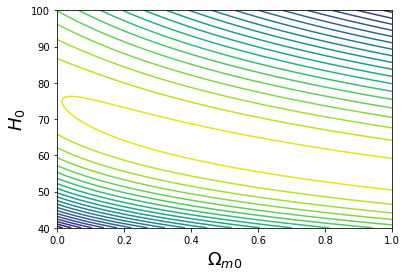

In [4]:
X,Y = np.meshgrid(Om_vals1, H_vals1)

plt.contour(X,Y,log_L1,20)
#plt.colorbar()
plt.ylabel(r'$H_0$', fontdict={'fontsize':18})
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})

### 2 b)

In [5]:
L_for_Om = np.exp(log_L1 - log_L1.max()).sum(axis=0)  # marginalized log likelihood for Omega_m
L_for_H = np.exp(log_L1 - log_L1.max()).sum(axis=1)

Text(0, 0.5, '$\\mathcal{L}$')

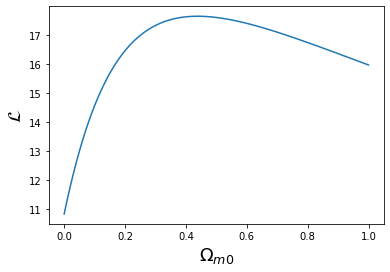

In [6]:
plt.plot(Om_vals1, L_for_Om)
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
plt.ylabel(r'$\mathcal{L}$', fontdict={'fontsize':18})

### This marginal likelihood plot and the contour plot above don't bound the $\Omega_m$  parameter from up well. So we cann't definitely say that this data set favors dark energy. 

### 2 c) 

In [7]:
## Gaussian prior for H_0

H_prior = sp.norm.pdf(H_vals1, loc=72, scale=8)

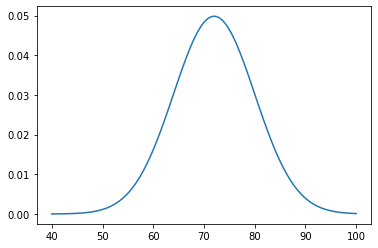

In [8]:
plt.plot(H_vals1, H_prior)

In [9]:
## cast H_prior to the shape of likelihood

H_prior_grid = np.tile(H_prior, (H_prior.shape[0]-1, 1)).T

In [10]:
H_prior_grid.shape

(101, 100)

In [11]:
post_likelihood = np.exp(log_L1) * H_prior_grid

Text(0.5, 0, '$\\Omega_{m0}$')

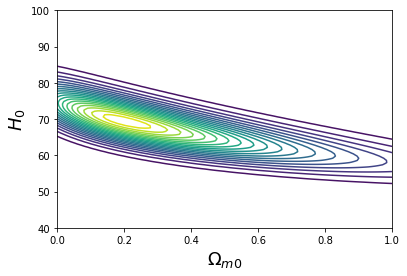

In [12]:
plt.contour(X,Y, post_likelihood,20)
#plt.colorbar()
plt.ylabel(r'$H_0$', fontdict={'fontsize':18})
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})

### 2 d)

In [13]:
Lk_for_Om = post_likelihood.sum(axis=0)  # marginalized log likelihood for Omega_m
Lk_for_H = post_likelihood.sum(axis=1)

Text(0, 0.5, '$\\mathcal{L}$')

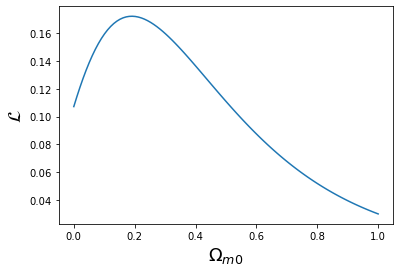

In [14]:
plt.plot(Om_vals1, Lk_for_Om)
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
plt.ylabel(r'$\mathcal{L}$', fontdict={'fontsize':18})

Text(0.5, 1.0, 'With Gaussian prior for $H_0$')

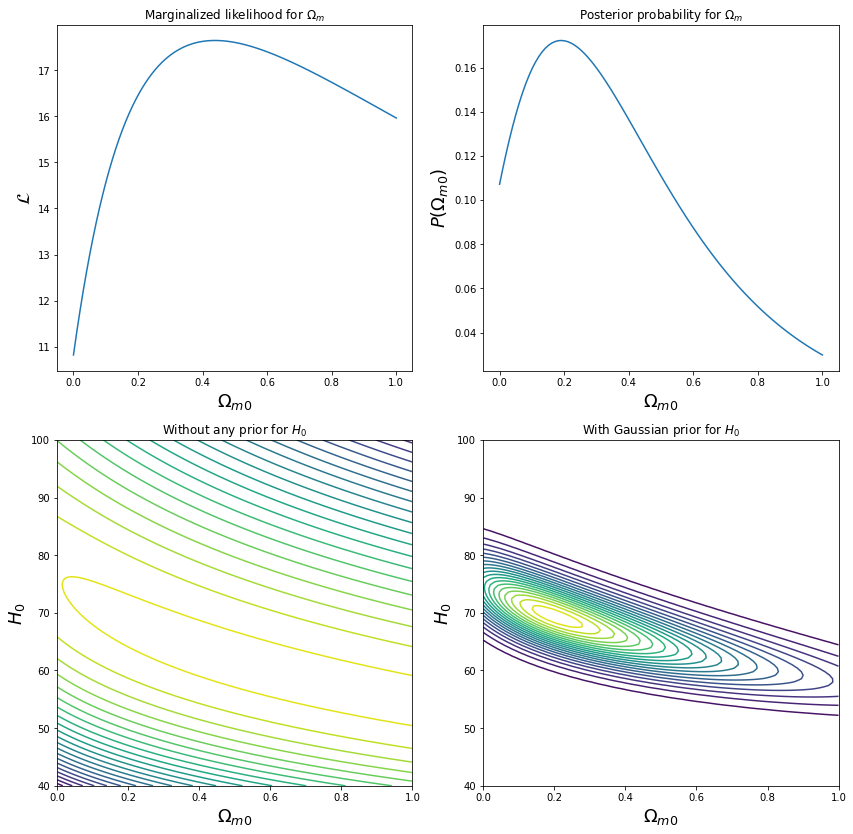

In [31]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(221)
ax1.plot(Om_vals1, L_for_Om)
ax1.set_xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
ax1.set_ylabel(r'$\mathcal{L}$', fontdict={'fontsize':18})
ax1.set_title('Marginalized likelihood for $\Omega_m$')

ax2 = fig.add_subplot(222)
ax2.plot(Om_vals1, Lk_for_Om)
ax2.set_xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
ax2.set_ylabel(r'$P(\Omega_{m0})$', fontdict={'fontsize':18})
ax2.set_title('Posterior probability for $\Omega_m$')

ax3 = fig.add_subplot(223)
ax3.contour(X,Y,log_L1,20)
#plt.colorbar()
ax3.set_ylabel(r'$H_0$', fontdict={'fontsize':18})
ax3.set_xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
ax3.set_title(r'Without any prior for $H_0$')

ax4 = fig.add_subplot(224)
ax4.contour(X,Y, post_likelihood,20)
#plt.colorbar()
ax4.set_ylabel(r'$H_0$', fontdict={'fontsize':18})
ax4.set_xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
ax4.set_title(r'With Gaussian prior for $H_0$')

## Prb 3. Credible intervals: numerical

In [34]:
chi2_posterior = -2*np.log(post_likelihood)

In [35]:
print('minimum of chi^2 : %f' %chi2_posterior.min())
print('\nchi^2 value that enclose the 68.3%% confidence region : %f' %(chi2_posterior.min() + 2.2977))
print('\nchi^2 value that enclose the 95.5%% confidence region : %f' %(chi2_posterior.min() + 6.1801))
print('\nchi^2 value that enclose the 99.7%% confidence region : %f' %(chi2_posterior.min() + 11.829))

minimum of chi^2 : 9.237367

chi^2 value that enclose the 68.3% confidence region : 11.535067

chi^2 value that enclose the 95.5% confidence region : 15.417467

chi^2 value that enclose the 99.7% confidence region : 21.066367


Text(0.5, 0, '$\\Omega_{m0}$')

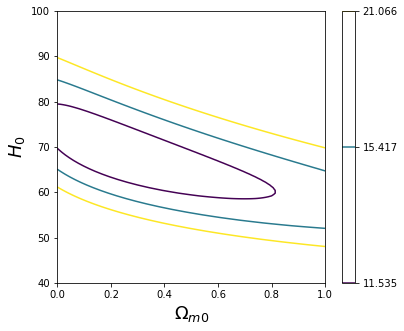

In [37]:
plt.figure(figsize=(6,5))
plt.contour(X,Y,chi2_posterior, [chi2_posterior.min() + 2.2977,  chi2_posterior.min() + 6.1801,
                        chi2_posterior.min() + 11.829])
plt.colorbar()
plt.ylabel(r'$H_0$', fontdict={'fontsize':18})
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})

## Prb 4. Bayes factor: simple example

### 4 a) The Bayes factor , K  is 
$$\begin{align}
K &=  \frac{P(D|M_1)}{P(D|M_2)} \\
  &=  \frac{P(M_1|D)P(M_1)}{P(M_2|D)P(M_2)} \\
  &=  \frac{0.5^{100}}{\int_0^1 p_h^{80} (1 - p_h)^{20} P(p_h)dp_h} \\
  &=  \frac{0.5^{100}}{\int_0^1 p_h^{80} (1 - p_h)^{20} P(p_h)dp_h} \\
  &=  \frac{0.5^{100}}{\int_0^1 p_h^{80} (1 - p_h)^{20} dp_h} \\ 
  &=  \frac{0.5^{100}}{1.8473×10^-23} \\
  &= 4.270345397179732 \times 10^{-08}
\end{align}$$

###  4 b) The reciprocal of the K value is  $2.34\times10^7$ which means the model with the free parameter $p_h$ is significantly favored than the fair coin model and it's decisive.

### 4 c) 
$$\begin{align}
K  &=  \frac{P(M_1|D)P(M_1)}{P(M_2|D)P(M_2)} \\
  &=  \frac{0.5^{10}}{\int_0^1 p_h^{8} (1 - p_h)^{2} P(p_h)dp_h} \\
  &=  \frac{0.5^{10}}{\int_0^1 p_h^{8} (1 - p_h)^{2} dp_h} \\ 
  &=  \frac{0.5^{10}}{\int_0^1 p_h^8 (1 - 2p_h + p_h^2) dp_h} \\ 
  &=  \frac{0.5^{10}}{\bigr \lvert p_h^9 (\frac{1}{9} - \frac{p_h}{5} + \frac{p_h^2}{11})\bigr \rvert_0^1}\\
  &=  \frac{0.5^{10}}{0.002} \\
  &= 0.4834
\end{align}
$$

### The reciprocal of the K value is  $2.069$ which means the model with the free parameter $p_h$ is slightly more favored than the fair coin model but it's not worth mentioning.

###  For 50 heads out of 100 toss the K value would be
$$\begin{align}
K  &=  \frac{P(M_1|D)P(M_1)}{P(M_2|D)P(M_2)} \\
  &=  \frac{0.5^{100}}{\int_0^1 p_h^{50} (1 - p_h)^{50} P(p_h)dp_h} \\
  &=  \frac{0.5^{100}}{\int_0^1 p_h^{50} (1 - p_h)^{50} dp_h} \\ 
  &=  \frac{0.5^{100}}{9.8135×10^-32} \\ 
  &= 8.0385
\end{align}
$$

### For 50 heads out of 100 toss it seems the fair coin model is more favored than the free parameter model.

### 4 d) The Bayes factor can favor the simpler model if we incorporate prior information in the free parameter model. In that case the posterior likelihood for the free parameter model will reduce significantly compared to the case where there is no prior information of the free parameter. This prior information will significantly reduce the parameter space of the free paremeter model.

## Prb 5. Bayes factor: astrophysical example

### 5 a) In Bayes factor calculation we work with ratio of likelihoods, so normalization doesn't affect anything.

### 5 b) Prior in the self-interacting dark matter model needs to be normalized because though we are working with ratio while calculating Bayes factor, we don't have any prior for the cold dark matter model.  As there is prior for only one of the two models normalization is not going to cancel out, so we need to normalize the prior for SIDM.

### 5 c)

In [54]:
sidm_data = np.loadtxt('../data/hw8-sidm.txt')

In [59]:
likelihood_data  = sidm_data[:, 1]
cross_sec = sidm_data[:, 0]

In [71]:
CDM_index = cross_sec.tolist().index(0.0)
CDM_likelihood = likelihood_data[CDM_index]

In [76]:
SIDM_prior = 1 /15.0 

In [78]:
SIDM_posterior = likelihood_data[500:] * SIDM_prior

In [80]:
bayes_factor = CDM_likelihood / SIDM_posterior.sum()

In [82]:
1 / bayes_factor

7.883647872385231

### The reciprocal of the bayes factor is 7.88 which means the SIDM model is more favored than CDM and the strength of the evidence is substantial.

### Now we can check what will happen with a tighter prior.

In [106]:
## with prior range 0-5 cm^2/g

SIDM_prior_new = 1 /5.0

SIDM_posterior_new = likelihood_data[500:1001] * SIDM_prior_new

bayes_factor_new = CDM_likelihood / SIDM_posterior_new.sum()

print(1/bayes_factor_new)

23.650858242959078


In [108]:
## with prior range 0-10 cm^2/g

SIDM_prior_new1 = 1 /10.0

SIDM_posterior_new1 = likelihood_data[500:1501] * SIDM_prior_new1

bayes_factor_new1 = CDM_likelihood / SIDM_posterior_new1.sum()

print(1 / bayes_factor_new1)

11.825471808574159


In [109]:
## with prior range -5-15 cm^2/g

SIDM_prior_new2 = 1 /20.0

SIDM_posterior_new2 = likelihood_data * SIDM_prior_new2

bayes_factor_new2 = CDM_likelihood / SIDM_posterior_new2.sum()

print(1 / bayes_factor_new2)

8.239848962532177


### I have checked the Bayes factor with different prior for cross-sections and it seems with a tighter prior we have a higher Bayes factor value favoring the SIDM model. On the other hand if the prior is over a larger range than the Bayes factor value decreases.

In [107]:
cross_sec.tolist().index(10.0)

1500

## Prb 6. Bayesian Information Criterion

### 6 a)

In [148]:
BIC_fr_coin_mod = -2 * np.log(special.comb(100,80) * (0.5)**100)
print(BIC_fr_coin_mod)

43.16816649375646


In [149]:
ph = np.linspace(0, 1, 100)
max_likelihood = 0
fit_ph = 0

for i, p in enumerate(ph):
    likelihood = special.comb(100, 80) * p**80 * (1 - p)**20
    
    if likelihood > max_likelihood :
        max_likelihood = likelihood
        fit_ph = p
print(max_likelihood)
print(fit_ph)

0.09917428362988488
0.797979797979798


In [150]:
BIC_free_parm_mod = 1*np.log(100) - 2*np.log(max_likelihood)
print(BIC_free_parm_mod)

9.226923257790396


In [151]:
del_BIC = BIC_fr_coin_mod - BIC_free_parm_mod
print(del_BIC)

33.94124323596606


### According to $\Delta$BIC method the evidence against the higher BIC model, which is here the fair coin model, is greater than ten and that means the free parameter model is very strongly favored.

### 6 b)

In [152]:
## for 50 heads out of 100 toss

BIC_fr_coin_mod1 = -2 * np.log(special.comb(100,50) * (0.5)**100)
print(BIC_fr_coin_mod1)

5.0617528079542105


In [154]:
ph = np.linspace(0, 1, 100)
max_likelihood1 = 0
fit_ph1 = 0

for i, p in enumerate(ph):
    likelihood = special.comb(100, 50) * p**50 * (1 - p)**50
    
    if likelihood > max_likelihood1 :
        max_likelihood1 = likelihood
        fit_ph1 = p
print(max_likelihood1)
print(fit_ph1)

0.0791842245874963
0.5050505050505051


In [155]:
BIC_free_parm_mod1 = 1*np.log(100) - 2*np.log(max_likelihood1)
print(BIC_free_parm_mod1)

9.677126554993958


In [156]:
del_BIC1 = BIC_fr_coin_mod1 - BIC_free_parm_mod1
print(del_BIC1)

-4.615373747039747


### According to $\Delta$BIC method the evidence against the higher BIC model, which is here the  free parameter model, is greater than two but less than six and that means the fair coin model is positively favored.

In [157]:
## for 8 heads out of 10 toss

BIC_fr_coin_mod2 = -2 * np.log(special.comb(10,8) * (0.5)**10)
print(BIC_fr_coin_mod2)

6.249618631658267


In [158]:
ph = np.linspace(0, 1, 100)
max_likelihood2 = 0
fit_ph2 = 0

for i, p in enumerate(ph):
    likelihood = special.comb(10, 8) * p**8 * (1 - p)**2
    
    if likelihood > max_likelihood2 :
        max_likelihood2 = likelihood
        fit_ph2 = p
print(max_likelihood2)
print(fit_ph2)

0.3019515681804313
0.797979797979798


In [159]:
BIC_free_parm_mod2 = 1*np.log(10) - 2*np.log(max_likelihood2)
print(BIC_free_parm_mod2)

4.697562382456898


In [160]:
del_BIC2 = BIC_fr_coin_mod2 - BIC_free_parm_mod2
print(del_BIC2)

1.5520562492013692


### According to $\Delta$BIC method the evidence against the higher BIC model, which is here the fair coin model, is greater than zero but less than two and that means the free parameter model is favored but not worth than a bare mention.

### Considering all three results and comapring them with the corresponding results using Bayes factor method we can say that BIC method perform equally well as Bayes factor method.